In [1]:
import numpy as np#you usually need numpy

#---these are for plots---#
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.size']=16
plt.rcParams['font.family']='dejavu sans'

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.rm']='custom'
plt.rcParams['mathtext.it']='stix:italic'
plt.rcParams['mathtext.bf']='stix:bold'
#-------------------------#


In [2]:
#load the module

from os import  getcwd, chdir

curDir=getcwd()#this is the directory of the notebook
chdir('../../src')#go to the direcory that interfacePy is located
from interfacePy.NSC import NSC 
from interfacePy.Cosmo import Cosmo 
from interfacePy.FT import FT #easy tick formatting

chdir(curDir)#return to the directory of the notebook

In [3]:
cosmo=Cosmo('../../src/data/eos2020.dat',0,1e5)

In [4]:
Hubble,rhoR = cosmo.Hubble, cosmo.rhoR

In [28]:
TEND=1e-2
c=3
Ti=1e12
ratio=0.95

umax=500
TSTOP=1e-4

In [29]:
# options for the solver
# These variables are optional. Yoou can use the NSC class without them.
initial_step_size=1e-2; #initial step the solver takes. 
minimum_step_size=1e-8; #This limits the sepsize to an upper limit. 
maximum_step_size=1e-2; #This limits the sepsize to a lower limit.
absolute_tolerance=1e-8; #absolute tolerance of the RK solver
relative_tolerance=1e-8; #relative tolerance of the RK solver
beta=0.9; #controls how agreesive the adaptation is. Generally, it should be around but less than 1.

#The stepsize does not increase more than fac_max, and less than fac_min. 
#This ensures a better stability. Ideally, fac_max=inf and fac_min=0, but in reality one must 
#tweak them in order to avoid instabilities.
fac_max=1.2;
fac_min=0.8;
maximum_No_steps=int(1e7); #maximum steps the solver can take Quits if this number is reached even if integration is not finished.


# NSC instance
BE=NSC(TEND,c,Ti,ratio,umax,TSTOP,
        initial_step_size,minimum_step_size, maximum_step_size, absolute_tolerance, 
        relative_tolerance, beta, fac_max, fac_min, maximum_No_steps)


In [30]:
# NSC instance
# you can always run it with the default parameters for the solver
# BE=NSC(TEND,c,Ti,ratio,umax,TSTOP)

In [31]:
# solve the Boltzmann equations (this only TE1, TE2, TD1, and TD2)
BE.solveNSC()

0.02994704246520996

In [32]:
BE.TE1,BE.TE2,BE.TD1,BE.TD2

(941764533584.2487,
 0.00638565743647542,
 5.857765791416423,
 0.0037080131199256306)

In [33]:
BE.getPoints()#this gives you all the points of integration
BE.getErrors()#this gives you the local errors


<IPython.core.display.Javascript object>


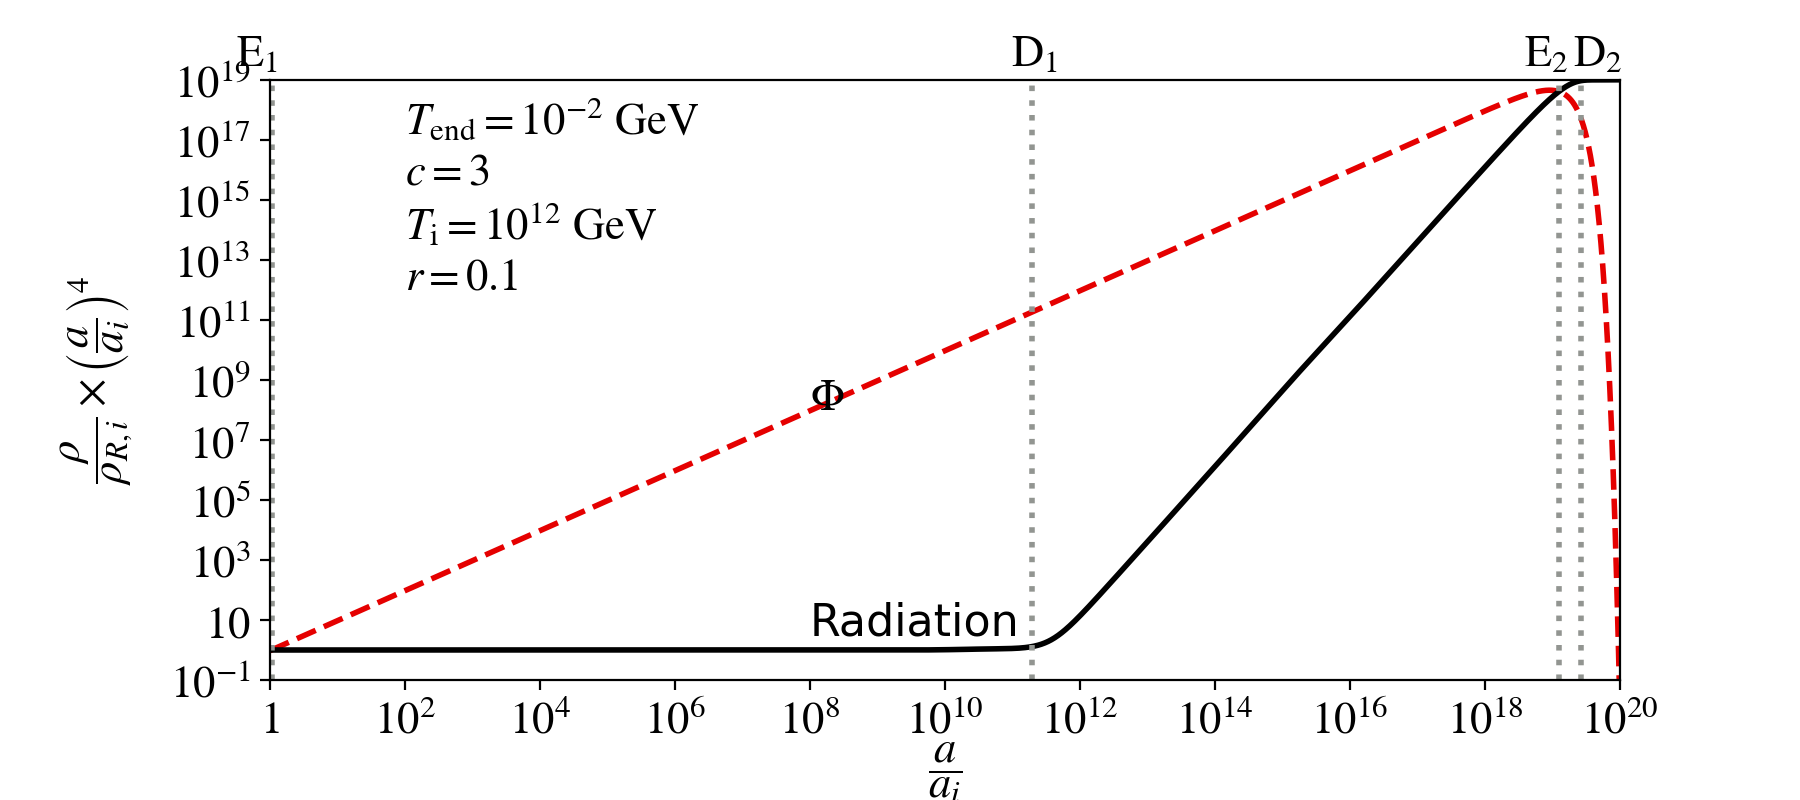

In [34]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    X=BE.a_ai
    
    Y=BE.rhoPhi/rhoR(BE.T[0])*BE.a_ai**4
    sub.plot(X,Y,linestyle='--',linewidth=2,alpha=1,c='xkcd:red',label=r'$\rho_{\Phi}$')

#     Min=Y[0]
#     Max=np.max(Y)
    
    Y=[rhoR(T)/rhoR(BE.T[0])*BE.a_ai[i]**4 for i,T in enumerate(BE.T)]
    sub.plot(X,Y,linestyle='-',linewidth=2,alpha=1,c='xkcd:black',label=r'$\rho_{R}$')
    
#     _=Y[0]
#     if Min>_:
#         Min=_
    
#     _=np.max(Y)
#     if Max<_:
#         Max=_
    
    sub.axvline(BE.aE1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.aE2,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.aD1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.aD2,c='xkcd:gray',linestyle=':',linewidth=2)

#     sub.set_yscale('log')
#     sub.set_xscale('log')
    
    sub.set_xlabel(r'$\dfrac{a}{a_i}$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\dfrac{\rho}{\rho_{R,i}} \times \left( \dfrac{a}{a_i} \right)^4$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
#     sub.set_ylim(Min*1e-2,Max*1e2)

#     sub.legend(bbox_to_anchor=(1, 0.0),borderaxespad=0., 
#            borderpad=0.05,ncol=1,loc='lower right',fontsize=14,framealpha=0)
    
    #set major ticks
    _M_xticks=[ 10.**i for i in range(0,25,2) ]
    _M_yticks=[ 10.**i for i in range(-1,25,2) ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ymax=1e19
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=1,xmax=1e20,ymin=1e-1,ymax=ymax,xscale='log',yscale='log')

    ft.format_ticks(plt,sub)    

    sub.text(x=1e8,y=3, s=r'Radiation')
    sub.text(x=1e8,y=1e8, s=r'$\Phi$')
    
    sub.text(x=1e2,y=1e12,
         s=r'$T_{\rm end}=10^{-2}~{\rm GeV}$'+'\n'+
             r'$c=3$'+'\n'+
             r'$T_{\rm i} =10^{12}~{\rm GeV} $'+'\n'+
             r'$r=0.1$'         
        )
    xf=0.3
    yf=2.8
    
    sub.text(x=xf*BE.aE1,y=ymax*yf,s=r'$\rm E_1$')
    sub.text(x=xf*BE.aE2,y=ymax*yf ,s=r'$\rm E_2$')
    sub.text(x=xf*BE.aD1,y=ymax*yf ,s=r' $\rm D_1$ ')
    sub.text(x=2.5*xf*BE.aD2,y=ymax*yf,s=r'$\rm D_2$')

#     fig.savefig('energy_densities.pdf',bbox_inches='tight')

    fig.show()

/tmp/ipykernel_31305/1948614012.py:8: RuntimeWarning: invalid value encountered in true_divide
  Y=np.abs(BE.drhoPhi/BE.rhoPhi)


<IPython.core.display.Javascript object>


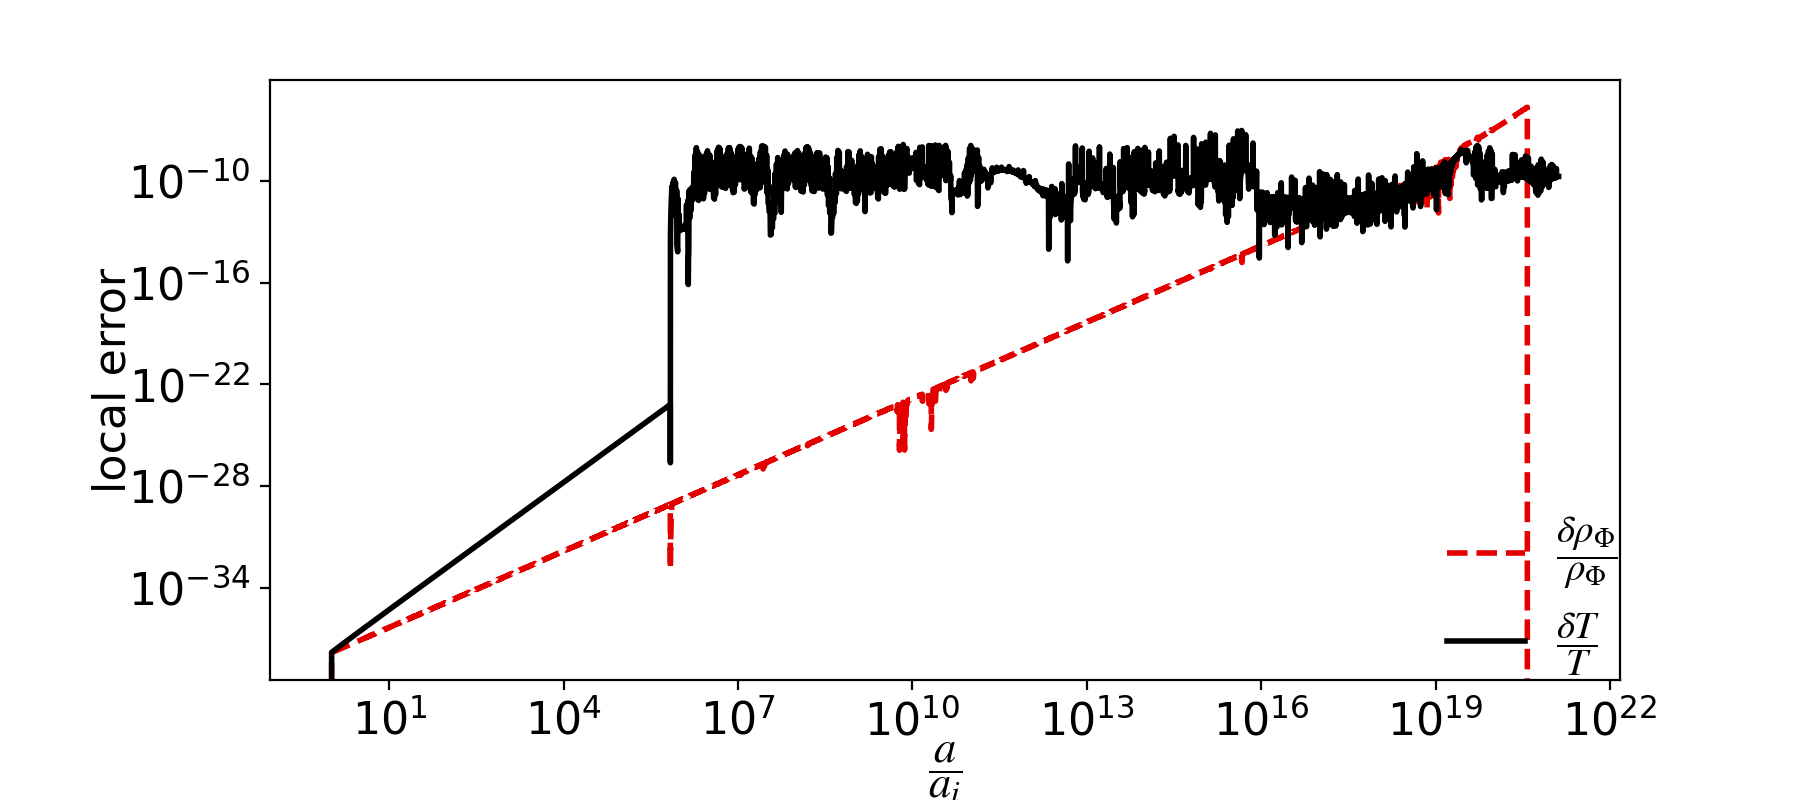

In [12]:
if True:
    #error plot 
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    X=BE.a_ai
    Y=np.abs(BE.drhoPhi/BE.rhoPhi)
    sub.plot(X,Y,linestyle='--',linewidth=2,alpha=1,c='xkcd:red',label=r'$\dfrac{\delta\rho_{\Phi}}{\rho_{\Phi}}$')
    
    Y=np.abs(BE.dT/BE.T)
    sub.plot(X,Y,linestyle='-',linewidth=2,alpha=1,c='xkcd:black',label=r'$\dfrac{\delta T}{T}$')
    

    sub.set_yscale('log')
    sub.set_xscale('log')
    
    sub.set_xlabel(r'$\dfrac{a}{a_i}$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'local error')
    sub.yaxis.set_label_coords(-0.1,0.5) 

    sub.legend(bbox_to_anchor=(1, 0.0),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='lower right',fontsize=14,framealpha=0)

    fig.show()

<IPython.core.display.Javascript object>


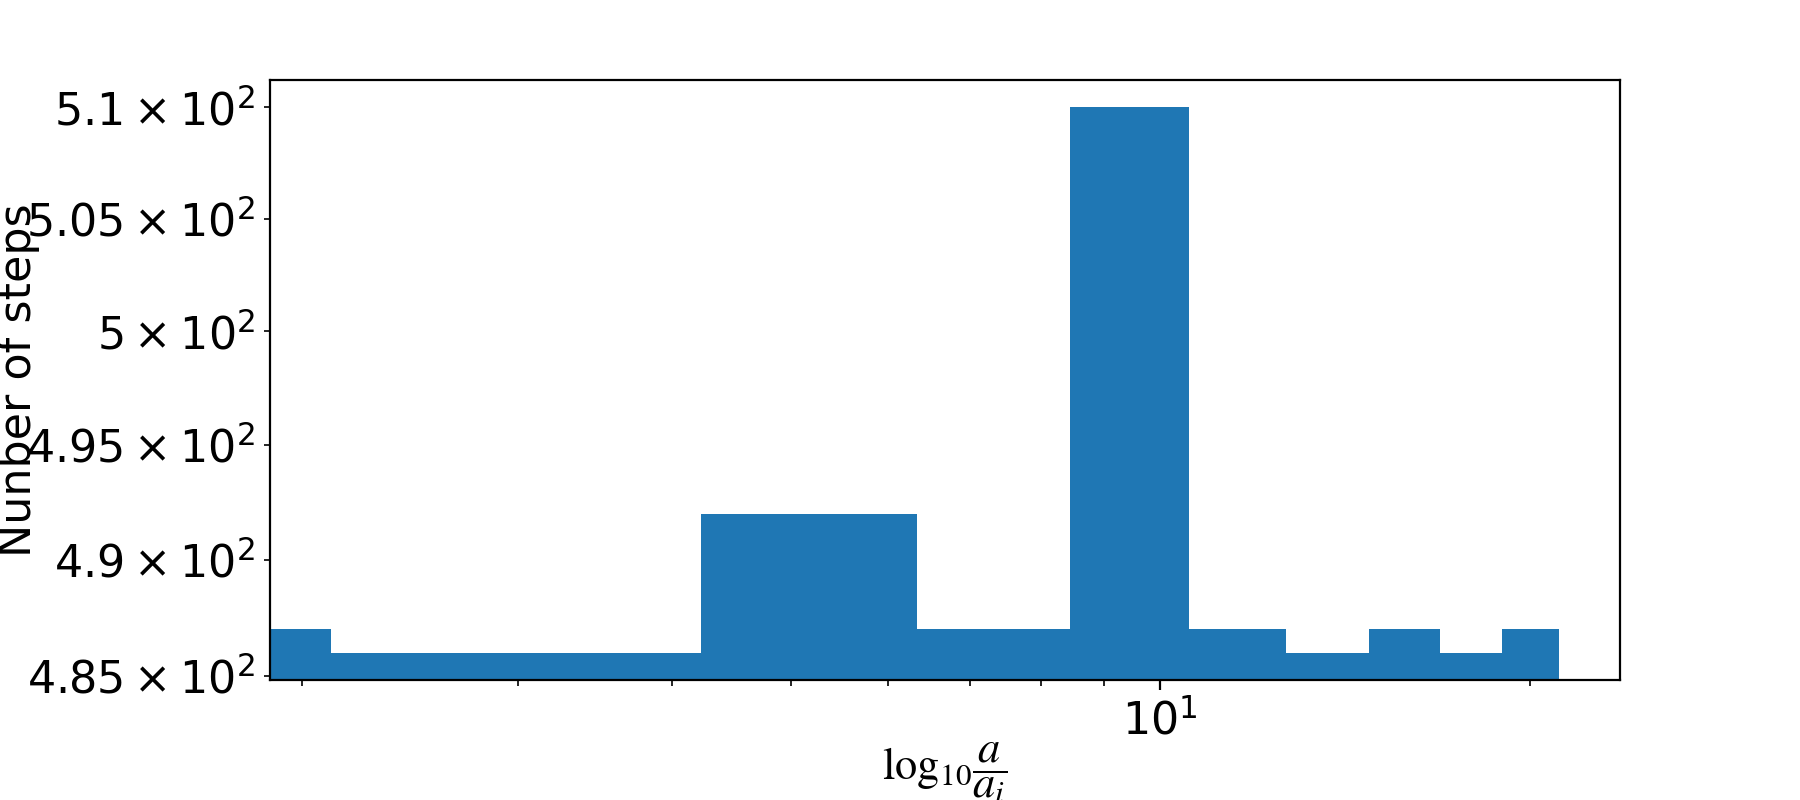

In [13]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    X=np.log10(BE.a_ai)
    
    sub.hist(X)


    sub.set_yscale('log')
    sub.set_xscale('log')
    
    sub.set_xlabel(r'$\log_{10} \dfrac{a}{a_i}$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'Nunber of steps')
    sub.yaxis.set_label_coords(-0.17,0.5) 

    fig.show()

In [14]:
#run the destructor
del BE